In [301]:
import numpy as np
import pandas as pd
from __future__ import division

## bring the data in

In [302]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
colnames = ['id', 'thickness', 'cell_size_uniform', 'cell_shape_uniform',
            'marginal_adhesion', 'epithelial_size', 'bare_nuclei', 'bland_chromatin',
            'norm_nucleoli', 'mitoses', 'cancer']
df.columns = colnames
print 'Are there nan? %s' % df.isnull().values.any()
df.describe()

Are there nan? False


,id,thickness,cell_size_uniform,cell_shape_uniform,marginal_adhesion,epithelial_size,bland_chromatin,norm_nucleoli,mitoses,cancer
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Simplify and encode the cancer class as 0 or 1 

In [303]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.cancer =  le.fit_transform(df.cancer)

print 'Number and pct of cancer: %d, %.2f%%' % (df.cancer[df.cancer==1].size,
                                          (df.cancer[df.cancer==1].size / df.cancer.size) * 100)
print 'Number and pct not cancer: %d, %.2f%%' % (df.cancer[df.cancer==0].size,
                                                (df.cancer[df.cancer==0].size / df.cancer.size) * 100)

Number and pct of cancer: 241, 34.48%
Number and pct not cancer: 458, 65.52%


#### run a check for any funny non numbers

In [304]:
for i in range(1, 11):
    print(type(df.iloc[0, i]))

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'str'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>


That's "bare_nuclei" with string type. What's going on here?

In [305]:
print 'number unique: %d' % len(df['bare_nuclei'].unique())
df['bare_nuclei'].unique()

number unique: 11


array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

So there's a question mark. How many are there?

In [306]:
np.where(df['bare_nuclei'] == '?')[0]

array([ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
       321, 411, 617])

This will show me which columns hold these funny question marks in case elsewhere

In [307]:
print df.columns[[np.unique(np.where(df.values == '?')[1])]]

Index([u'bare_nuclei'], dtype='object')


Let's see what's going on in those rows with question marks

In [308]:
df[df['bare_nuclei'].values == '?']

,id,thickness,cell_size_uniform,cell_shape_uniform,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,cancer
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


In [309]:
print 'Number missing where there is cancer: %d' % (len(np.where(df[df['bare_nuclei'].values == '?']['cancer'].values == 1)[0]))
print 'Pct missing where there is cancer: %.2f%%' % (len(np.where(df[df['bare_nuclei'].values == '?']['cancer'].values == 1)[0]) / 16 * 100)

Number missing where there is cancer: 2
Pct missing where there is cancer: 12.50%


Would be nice to run array of stats to determine if there's a latent factor that explains why these are missing values. 

But it's only 2% of the data. 
For now, assume it's because the lab tech forgot to take the reading.


In [330]:
df_cleaned = df[df['bare_nuclei'] != '?']
#df[df['bare_nuclei'] != '?']['bare_nuclei'].astype('int')

In [331]:
df_cleaned.loc[:, 'bare_nuclei'] = df_cleaned['bare_nuclei'].astype('int')

In [333]:
df_cleaned

,id,thickness,cell_size_uniform,cell_shape_uniform,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,cancer
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [335]:
for i in range(1, 11):
    print(type(df_cleaned.iloc[0, i]))

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>


In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

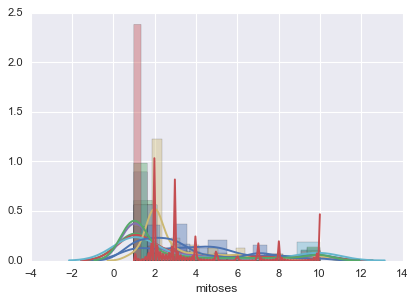

In [340]:
for name in colnames[1:10]:
    sns.distplot(df_cleaned[name])

In [347]:
train_dat = df_cleaned.iloc[:, 1:10]

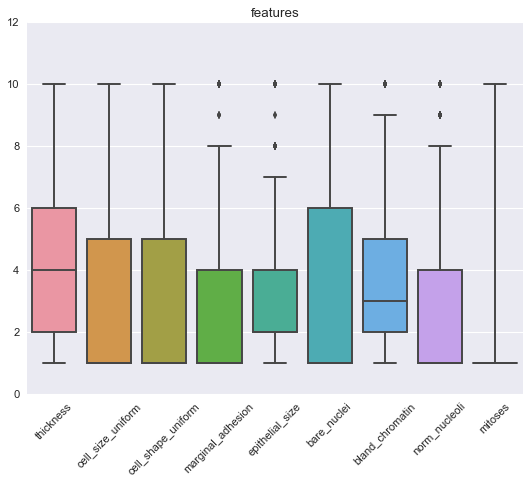

In [369]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(train_dat)
#featbars = sns.boxplot(train_dat)
fig.axis(ymin=0, ymax=12);
for item in fig.get_xticklabels():
    item.set_rotation(45)
fig.set_title('features')

### How correlated are these features?

In [497]:
print train_dat.corr()
dd = np.array(train_dat.corr())
np.fill_diagonal(dd, 0)

                    thickness  cell_size_uniform  cell_shape_uniform  \
thickness            1.000000           0.642481            0.653470   
cell_size_uniform    0.642481           1.000000            0.907228   
cell_shape_uniform   0.653470           0.907228            1.000000   
marginal_adhesion    0.487829           0.706977            0.685948   
epithelial_size      0.523596           0.753544            0.722462   
bare_nuclei          0.593091           0.691709            0.713878   
bland_chromatin      0.553742           0.755559            0.735344   
norm_nucleoli        0.534066           0.719346            0.717963   
mitoses              0.350957           0.460755            0.441258   

                    marginal_adhesion  epithelial_size  bare_nuclei  \
thickness                    0.487829         0.523596     0.593091   
cell_size_uniform            0.706977         0.753544     0.691709   
cell_shape_uniform           0.685948         0.722462     0.71387

In [505]:
for i, val in enumerate(dd.mean(1)):
    print train_dat.columns[i], '%.3f' % val

thickness 0.482
cell_size_uniform 0.626
cell_shape_uniform 0.620
marginal_adhesion 0.537
epithelial_size 0.545
bare_nuclei 0.540
bland_chromatin 0.558
norm_nucleoli 0.543
mitoses 0.363


#### What's going on with mitoses?

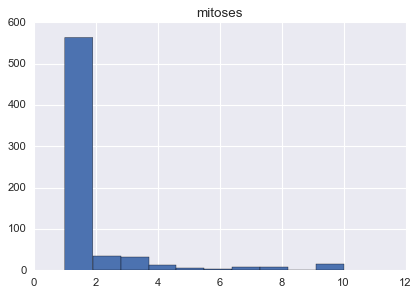

In [372]:
plt.hist(train_dat['mitoses'])
plt.title('mitoses')

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from collections import OrderedDict

In [441]:
X = train_dat
ss = StandardScaler()
ssX = ss.fit_transform(X)
y = df_cleaned['cancer']
X_train, X_test, y_train, y_test = train_test_split(ssX, y,
                                                    test_size=0.33)


print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

### Get first pass with logistic regression and see how we do

In [443]:
lr = LogisticRegression()
scores = cross_val_score(estimator=lr, X=ssX, y=y, cv=5, n_jobs=-1)
print('logistic regression accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))

logistic regression accuracy: 0.968 +/- 0.022


In [444]:
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
lr_train = accuracy_score(y_train, y_train_pred)
lr_test = accuracy_score(y_test, y_test_pred)
print('Train/test accuracies: %.3f/%.3f' % (lr_train, lr_test))
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC: %f' % roc_auc)
print(classification_report(y_test, y_test_pred))

Train/test accuracies: 0.967/0.973
AUC: 0.970976
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       146
          1       0.96      0.96      0.96        80

avg / total       0.97      0.97      0.97       226



AUC: 0.996572


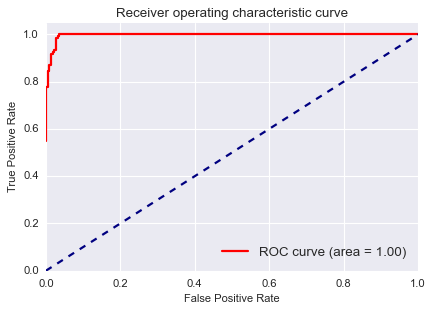

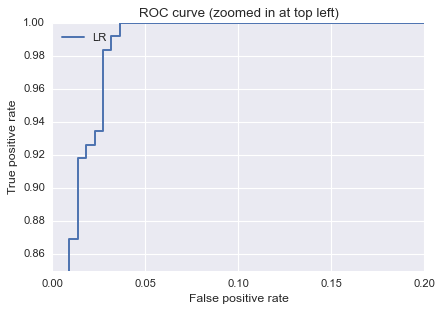

In [461]:
y_train_pred = lr.predict_proba(X_train)[:, 1]
y_test_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC: %f' % roc_auc)

y_test_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred)


%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('False Positive Rate', {'fontsize': 10})
plt.ylabel('True Positive Rate', {'fontsize': 10})
plt.title('Receiver operating characteristic curve', {'fontsize': 12})
plt.legend(loc="lower right", fontsize=12)
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.85, 1.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

### ensemble tests

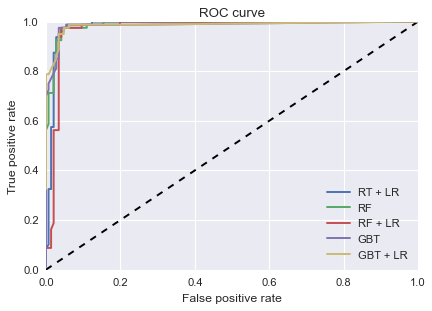

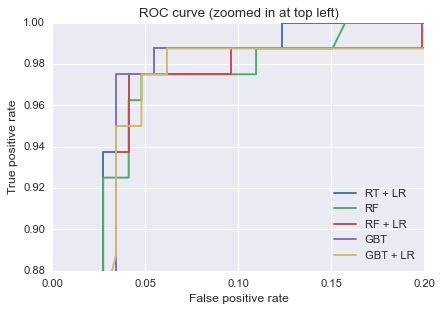

In [506]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = train_dat.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.33)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.88, 1.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [507]:
y_test_predict_rf_lm = rf_lm.predict(rf_enc.transform(rf.apply(X_test)))
print('Classification report: RF + LR')
print(classification_report(y_test, y_test_predict_rf_lm))

Classification report: RF + LR
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       146
          1       0.93      0.96      0.94        80

avg / total       0.96      0.96      0.96       226



In [508]:
y_test_predict_grd = grd.predict(X_test)
print('Classification report: GBT')
print(classification_report(y_test, y_test_predict_grd))

Classification report: GBT
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       146
          1       0.94      0.96      0.95        80

avg / total       0.96      0.96      0.96       226



In [509]:
y_test_predict_rt_lm = pipeline.predict(X_test)
print('Classification report: RT + LM')
print(classification_report(y_test, y_test_predict_rt_lm))

Classification report: RT + LM
             precision    recall  f1-score   support

          0       0.99      0.96      0.97       146
          1       0.93      0.97      0.95        80

avg / total       0.97      0.96      0.96       226



In [510]:
y_test_predict_rf = rf.predict(X_test)
print('Classification report: RF')
print(classification_report(y_test, y_test_predict_rf))

Classification report: RF
             precision    recall  f1-score   support

          0       0.99      0.95      0.97       146
          1       0.92      0.97      0.95        80

avg / total       0.96      0.96      0.96       226



In [513]:
feat_labels = train_dat.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%3d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))


  1) cell_size_uniform              0.411719
  2) cell_shape_uniform             0.206569
  3) bare_nuclei                    0.124808
  4) norm_nucleoli                  0.104752
  5) epithelial_size                0.091816
  6) bland_chromatin                0.025220
  7) thickness                      0.021571
  8) marginal_adhesion              0.013544
  9) mitoses                        0.000000


#### mitoses might be worthless here

In [526]:
X = train_dat.iloc[:, :8]
ss = StandardScaler()
ssX = ss.fit_transform(X)
y = df_cleaned['cancer']
X_train, X_test, y_train, y_test = train_test_split(ssX, y,
                                                    test_size=0.33)


print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(457, 8)
(226, 8)
(457,)
(226,)


#### run it back again

cross val Logistic Regression accuracy: 0.966 +/- 0.024
Prediction train/test accuracies: 0.974/0.969
AUC: 0.962482
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       154
          1       0.96      0.94      0.95        72

avg / total       0.97      0.97      0.97       226

AUC: 0.996934


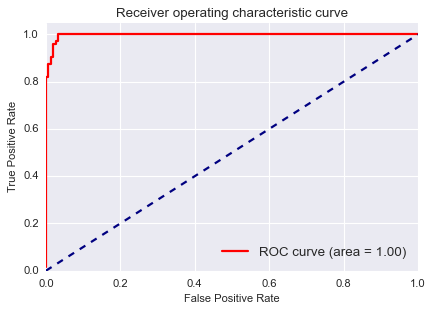

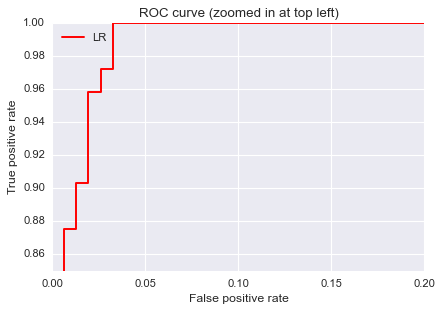

In [528]:
lr = LogisticRegression()
scores = cross_val_score(estimator=lr, X=ssX, y=y, cv=5, n_jobs=-1)
print('cross val Logistic Regression accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
lr_train = accuracy_score(y_train, y_train_pred)
lr_test = accuracy_score(y_test, y_test_pred)
print('Prediction train/test accuracies: %.3f/%.3f' % (lr_train, lr_test))
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC: %f' % roc_auc)
print(classification_report(y_test, y_test_pred))

y_train_pred = lr.predict_proba(X_train)[:, 1]
y_test_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC: %f' % roc_auc)

y_test_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred)


%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('False Positive Rate', {'fontsize': 10})
plt.ylabel('True Positive Rate', {'fontsize': 10})
plt.title('Receiver operating characteristic curve', {'fontsize': 12})
plt.legend(loc="lower right", fontsize=12)
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.85, 1.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LR', color='red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

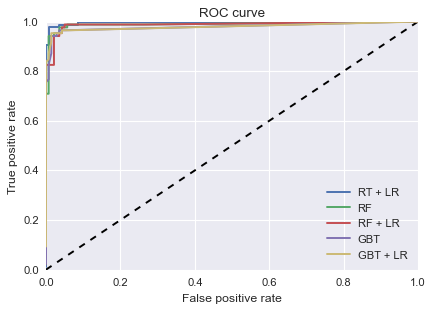

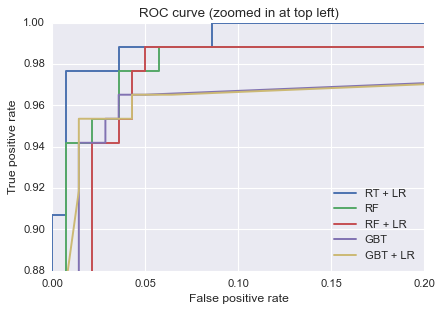

In [537]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = train_dat.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.33)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.88, 1.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [538]:
y_test_predict_rf = rf.predict(X_test)
print('Classification report: RF')
print(classification_report(y_test, y_test_predict_rf))

Classification report: RF
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       140
          1       0.95      0.95      0.95        86

avg / total       0.96      0.96      0.96       226



In [539]:
y_test_predict_rf_lm = rf_lm.predict(rf_enc.transform(rf.apply(X_test)))
print('Classification report: RF + LR')
print(classification_report(y_test, y_test_predict_rf_lm))

Classification report: RF + LR
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       140
          1       0.96      0.90      0.93        86

avg / total       0.95      0.95      0.95       226



In [546]:
y_test_predict_rt_lm = pipeline.predict(X_test)
print('Classification report: RT + LR')
print(classification_report(y_test, y_test_predict_rt_lm))

Classification report: RT + LR
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       140
          1       0.99      0.97      0.98        86

avg / total       0.98      0.98      0.98       226



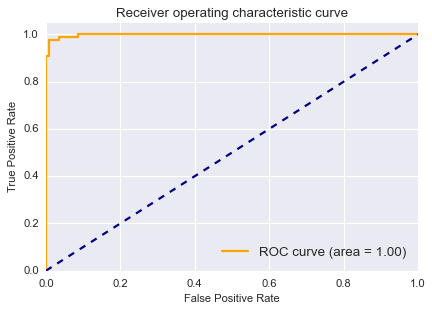

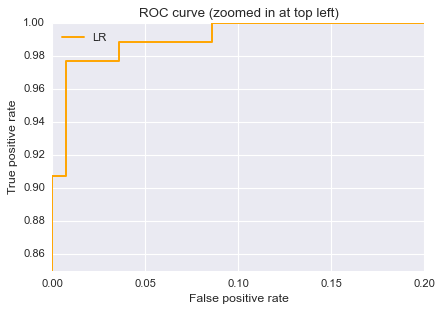

In [549]:
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)
roc_auc = auc(fpr_rt_lm, tpr_rt_lm)

plt.figure()
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('False Positive Rate', {'fontsize': 10})
plt.ylabel('True Positive Rate', {'fontsize': 10})
plt.title('Receiver operating characteristic curve', {'fontsize': 12})
plt.legend(loc="lower right", fontsize=12)
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.85, 1.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='LR', color='orange')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()